<a href="https://colab.research.google.com/github/taufikdimas/Machine-Learning-2025/blob/main/JS07%20-%20Regresi/TG07_2341720062_Taufik_Dimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Multiple Linear Regression – Medical Cost Personal Dataset




## 1. Setup & Load Dataset

In [ ]:

import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Pastikan file insurance.csv berada di folder yang sama dengan notebook, atau ubah path sesuai lokasi Anda.
csv_path = "insurance.csv"
df = pd.read_csv(csv_path)

df.head(10)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## 2. Ringkasan Dataset

In [ ]:

print("Jumlah baris, kolom:", df.shape)
print("\nTipe data setiap kolom:")
print(df.dtypes)

print("\nDescriptive statistics (numerik):")
df.describe()


Jumlah baris, kolom: (1338, 7)

Tipe data setiap kolom:
age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Descriptive statistics (numerik):


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 3. Visualisasi Data

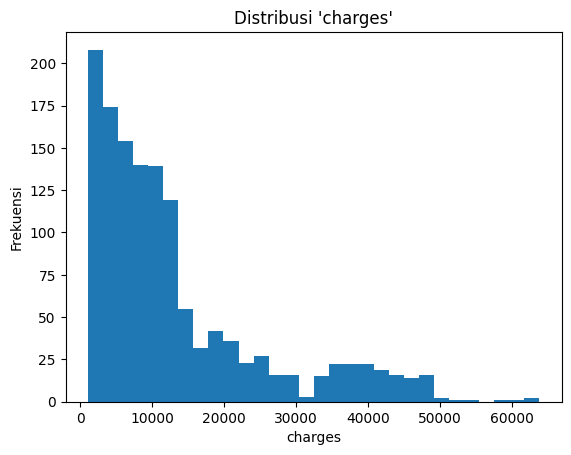

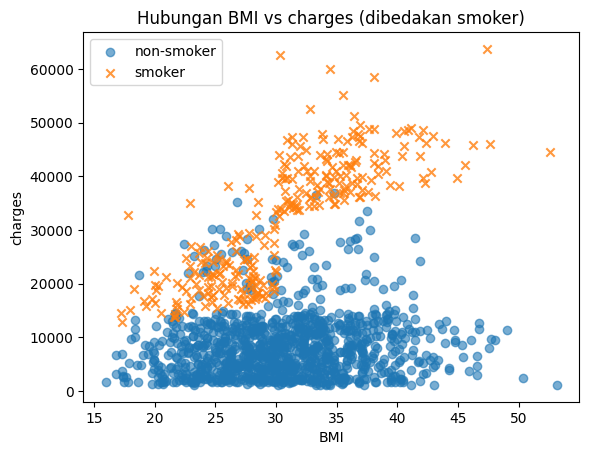

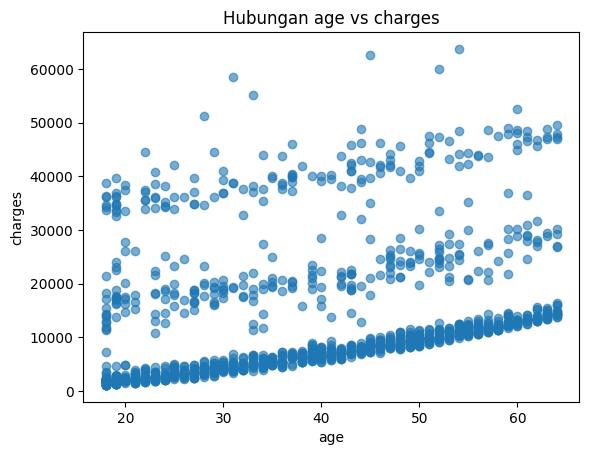

In [ ]:

# Distribusi charges
plt.figure()
plt.hist(df["charges"], bins=30)
plt.title("Distribusi 'charges'")
plt.xlabel("charges")
plt.ylabel("Frekuensi")
plt.show()

# BMI vs charges (smoker vs non-smoker)
import numpy as np

plt.figure()
mask_smoker = df["smoker"] == "yes"
plt.scatter(df.loc[~mask_smoker, "bmi"], df.loc[~mask_smoker, "charges"], label="non-smoker", marker="o", alpha=0.6)
plt.scatter(df.loc[mask_smoker, "bmi"], df.loc[mask_smoker, "charges"], label="smoker", marker="x", alpha=0.8)
plt.title("Hubungan BMI vs charges (dibedakan smoker)")
plt.xlabel("BMI")
plt.ylabel("charges")
plt.legend()
plt.show()

# age vs charges
plt.figure()
plt.scatter(df["age"], df["charges"], alpha=0.6)
plt.title("Hubungan age vs charges")
plt.xlabel("age")
plt.ylabel("charges")
plt.show()


## 4. Preprocessing & Modeling

In [ ]:

target_col = "charges"
feature_cols = ["age", "sex", "bmi", "children", "smoker", "region"]

X = df[feature_cols].copy()
y = df[target_col].values

numeric_features = ["age", "bmi", "children"]
categorical_features = ["sex", "smoker", "region"]

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop="first", handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

linreg = LinearRegression()
pipe = Pipeline(steps=[("preprocess", preprocessor),
                      ("model", linreg)])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

r2_train = pipe.score(X_train, y_train)
r2_test = pipe.score(X_test, y_test)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(y_test, y_pred)

print("Evaluasi Model (Linear Regression)")
print("R-squared (Train):", round(r2_train, 4))
print("R-squared (Test) :", round(r2_test, 4))
print("MSE             :", round(mse, 2))
print("RMSE            :", round(rmse, 2))
print("MAE             :", round(mae, 2))


Evaluasi Model (Linear Regression)
R-squared (Train): 0.7417
R-squared (Test) : 0.7836
MSE             : 33596915.85
RMSE            : 5796.28
MAE             : 4181.19


## 5. Diagnostic Plots

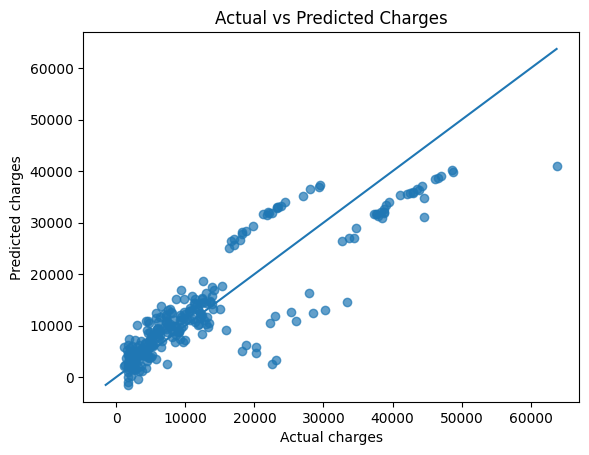

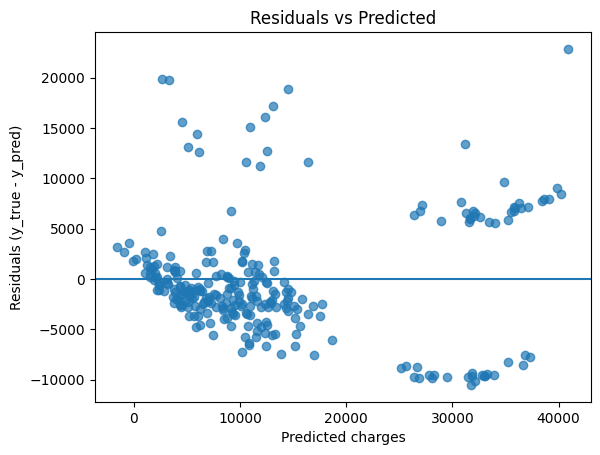

In [ ]:

# Actual vs Predicted
plt.figure()
plt.scatter(y_test, y_pred, alpha=0.7)
plt.title("Actual vs Predicted Charges")
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val])
plt.show()

# Residuals vs Predicted
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(0)
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted charges")
plt.ylabel("Residuals (y_true - y_pred)")
plt.show()


## 6. Koefisien Fitur

In [ ]:

ohe = pipe.named_steps["preprocess"].named_transformers_["cat"]
cat_feature_names = list(ohe.get_feature_names_out(categorical_features))
all_feature_names = numeric_features + cat_feature_names

coefs = pipe.named_steps["model"].coef_
coef_df = pd.DataFrame({"feature": all_feature_names, "coef": coefs})
coef_df.sort_values(by="coef", key=lambda s: s.abs(), ascending=False, inplace=True)
coef_df.reset_index(drop=True, inplace=True)
coef_df


,feature,coef
0,smoker_yes,23651.128856
1,age,3614.975415
2,bmi,2036.228123
3,region_southwest,-809.799354
4,region_southeast,-657.864297
5,children,516.890247
6,region_northwest,-370.677326
7,sex_male,-18.591692


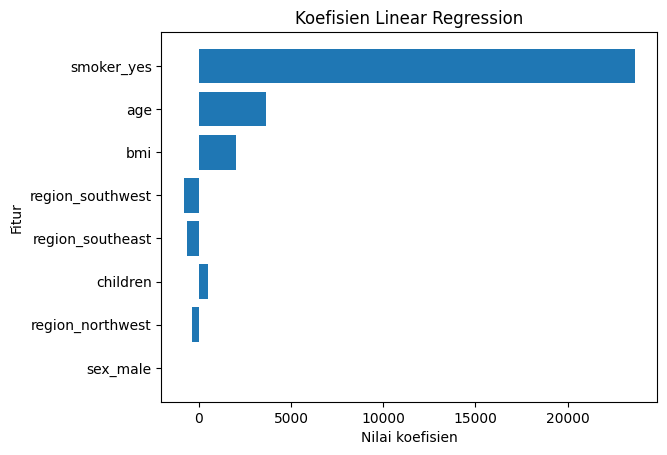

In [ ]:

# Plot koefisien
plt.figure()
plt.barh(coef_df["feature"], coef_df["coef"])
plt.title("Koefisien Linear Regression")
plt.xlabel("Nilai koefisien")
plt.ylabel("Fitur")
plt.gca().invert_yaxis()
plt.show()


## Analisis Performa Model

### Subtask:
Interpretasikan nilai R-squared, MSE, RMSE, dan MAE untuk menilai kemampuan prediktif serta akurasi model.

### Interpretasi Performa Model

Berdasarkan metrik evaluasi dari model Linear Regression:

-   **R-squared (Test):** `0.7836`
    -   Nilai ini menunjukkan bahwa sekitar **78.36%** varians pada medical `charges` dapat dijelaskan oleh fitur yang digunakan dalam model (age, sex, bmi, children, smoker, region) pada data yang belum pernah dilihat. R-squared yang lebih tinggi mengindikasikan kecocokan model yang lebih baik dalam menangkap variasi pada variabel target.

-   **Mean Squared Error (MSE):** `33,596,915.85`
    -   MSE merepresentasikan rata-rata kuadrat dari galat (error), yaitu rata-rata kuadrat selisih antara nilai prediksi dan nilai aktual. Karena galat dikuadratkan, MSE memberikan bobot lebih besar pada galat yang besar. Satuan MSE adalah kuadrat satuan variabel target (mis. dolar^2), sehingga kurang intuitif bila dilihat sendiri tetapi berguna untuk perbandingan antar model.

-   **Root Mean Squared Error (RMSE):** `5796.28`
    -   RMSE adalah akar kuadrat dari MSE, dan mengukur besarnya galat rata-rata dalam satuan variabel target (dolar). RMSE sebesar $5796.28 berarti secara rata-rata prediksi model meleset sekitar $5796.28 dari nilai charges yang sebenarnya.

-   **Mean Absolute Error (MAE):** `4181.19`
    -   MAE adalah rata-rata dari selisih absolut antara prediksi dan nilai aktual. MAE sebesar $4181.19 berarti rata-rata perbedaan absolut antara prediksi model dan nilai aktual sekitar $4181.19.

**Ringkasan:**

Nilai R-squared 0.7836 menunjukkan model memiliki kecocokan yang cukup baik, menjelaskan proporsi varians yang substansial pada charges. MAE sekitar $4181 mengindikasikan kesalahan prediksi tipikal pada kisaran tersebut, sedangkan RMSE yang lebih tinggi ($5796) menunjukkan bahwa ada beberapa galat besar yang memberikan kontribusi lebih pada MSE/RMSE karena sifat kuadratnya.

## Interpret Feature Coefficients


### Interpretasi Koefisien Fitur

Berdasarkan `coef_df`, kita dapat menganalisis pengaruh setiap fitur terhadap `charges` (biaya medis):

-   **smoker_yes**: Ini adalah fitur paling dominan. Koefisien `23651.13` menunjukkan bahwa, jika seseorang adalah perokok (`smoker_yes` = 1) dibandingkan dengan bukan perokok (`smoker_yes` = 0), biaya medis mereka diperkirakan akan **meningkat secara signifikan** sebesar sekitar $23,651, dengan asumsi faktor lain konstan. Ini menunjukkan bahwa status merokok adalah prediktor biaya medis yang sangat kuat.

-   **age**: Koefisien positif `3614.98` menunjukkan bahwa untuk setiap peningkatan satu unit (setelah scaling) dalam usia, biaya medis diperkirakan akan **meningkat** sekitar $3,615. Ini konsisten dengan ekspektasi bahwa orang yang lebih tua cenderung memiliki biaya medis yang lebih tinggi.

-   **bmi**: Koefisien positif `2036.23` mengindikasikan bahwa untuk setiap peningkatan satu unit (setelah scaling) dalam BMI, biaya medis diperkirakan akan **meningkat** sekitar $2,036. Ini menunjukkan bahwa BMI yang lebih tinggi (obesitas) berhubungan dengan biaya medis yang lebih tinggi.

-   **children**: Koefisien positif `516.89` menunjukkan bahwa memiliki lebih banyak anak berkorelasi dengan sedikit **peningkatan** biaya medis. Namun, pengaruhnya jauh lebih kecil dibandingkan dengan usia, BMI, atau status perokok.

-   **region_southwest, region_southeast, region_northwest**: Koefisien negatif untuk fitur region (`-809.80`, `-657.86`, `-370.68`) menunjukkan bahwa, dibandingkan dengan region yang menjadi dasar (karena `drop="first"` pada OneHotEncoder, yang kemungkinan adalah 'northeast'), orang di wilayah barat daya, tenggara, dan barat laut cenderung memiliki biaya medis yang **lebih rendah**. Perhatikan bahwa koefisien ini relatif kecil dibandingkan dengan fitur `smoker_yes` atau `age`.

-   **sex_male**: Koefisien negatif yang sangat kecil (`-18.59`) menunjukkan bahwa, dibandingkan dengan wanita, pria memiliki biaya medis yang sedikit **lebih rendah**, tetapi efek ini hampir tidak signifikan dan bisa diabaikan dalam konteks praktis.

**Ringkasan Korelasi:**

-   **Korelasi Positif Kuat**: `smoker_yes` adalah faktor pendorong terbesar untuk peningkatan biaya. `age` dan `bmi` juga memiliki korelasi positif yang signifikan.
-   **Korelasi Positif Lemah**: `children` memiliki korelasi positif yang sangat lemah.
-   **Korelasi Negatif Lemah**: Fitur region (`region_southwest`, `region_southeast`, `region_northwest`) dan `sex_male` menunjukkan korelasi negatif yang relatif lemah, yang berarti mereka cenderung menurunkan biaya dibandingkan dengan kategori dasarnya, meskipun efeknya minimal terutama untuk `sex_male`.

## Ringkasan Temuan dan Keterbatasan

### Subtask:
Berikan ringkasan singkat tentang insight utama dari model dan diskusikan keterbatasan atau area untuk penyelidikan lanjutan, misalnya asumsi homoskedastisitas yang terlihat dari plot residual.

## Ringkasan:

### Tanya Jawab

1.  **Seberapa baik model regresi linear memprediksi biaya medis?**
    Model menjelaskan sekitar 78.36% dari variasi pada biaya medis pada data yang belum pernah dilihat (R-squared = 0.7836). Secara rata-rata, prediksi model meleset sekitar $4181.19 (MAE) dan $5796.28 (RMSE) dari nilai aktual biaya medis.

2.  **Faktor apa saja yang paling berpengaruh terhadap biaya medis menurut model?**
    Faktor paling berpengaruh adalah status perokok (smoker), yang berkaitan dengan peningkatan biaya medis sekitar $23,651.13. Age dan BMI juga menunjukkan korelasi positif, meningkatkan biaya sebesar sekitar $3,614.98 per unit skala usia dan $2,036.23 per unit skala BMI, masing-masing.

### Temuan Utama Analisis Data

*   **Performa Model:** Model mencapai R-squared 0.7836 pada set uji, yang berarti model menjelaskan sekitar 78.36% variasi pada biaya medis.
*   **Akurasi Prediksi:** Kesalahan absolut rata-rata (MAE) adalah $4181.19, dan Root Mean Squared Error (RMSE) adalah $5796.28, keduanya dalam satuan dolar dan memberi gambaran seberapa jauh prediksi dari nilai aktual.
*   **Dominasi Status Perokok:** Menjadi perokok (`smoker_yes`) adalah prediktor paling signifikan, meningkatkan biaya medis sekitar $23,651.13, dengan asumsi faktor lain konstan.
*   **Dampak Age dan BMI:** `age` dan `bmi` juga memiliki pengaruh positif yang nyata terhadap biaya medis, dengan koefisien sekitar $3,614.98 dan $2,036.23 per unit skala, masing-masing.
*   **Faktor Minor:** Jumlah `children` memiliki korelasi positif yang lemah ($516.89), sedangkan `region` (dibandingkan baseline, kemungkinan 'northeast') dan `sex_male` menunjukkan korelasi negatif atau hampir tidak signifikan, menunjukkan penurunan biaya yang kecil. Misalnya, `sex_male` memiliki koefisien hampir tidak signifikan sebesar -$18.59.

### Insight / Langkah Selanjutnya

*   Model secara efektif mengidentifikasi bahwa status perokok adalah pendorong utama meningkatnya biaya medis. Insight ini bisa digunakan untuk intervensi kesehatan atau kebijakan publik yang menargetkan pengurangan biaya kesehatan.
*   Penyelidikan lanjutan pada plot diagnostik (mis. residual untuk memeriksa homoskedastisitas) dan eksplorasi hubungan non-linier atau interaksi antar fitur dapat meningkatkan akurasi dan ketahanan model.